## The Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns
from scipy import stats
!pip install statsmodels
import statsmodels.api as sm
import time

     |████████████████████████████████| 9.5 MB 13.5 MB/s 
     |████████████████████████████████| 231 kB 60.0 MB/s 


In [2]:
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')
prev_app = pd.read_csv('previous_application.csv') 
cc_balance = pd.read_csv('credit_card_balance.csv')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print(pd.Series(list(set(prev_app.SK_ID_CURR) & set(app_train.SK_ID_CURR))).shape)
print(app_train.shape)

print(pd.Series(list(set(prev_app.SK_ID_CURR) & set(app_test.SK_ID_CURR))).shape)
print(app_test.shape)

(291057,)
(307511, 122)
(47800,)
(48744, 121)


In [4]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Missing Data

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


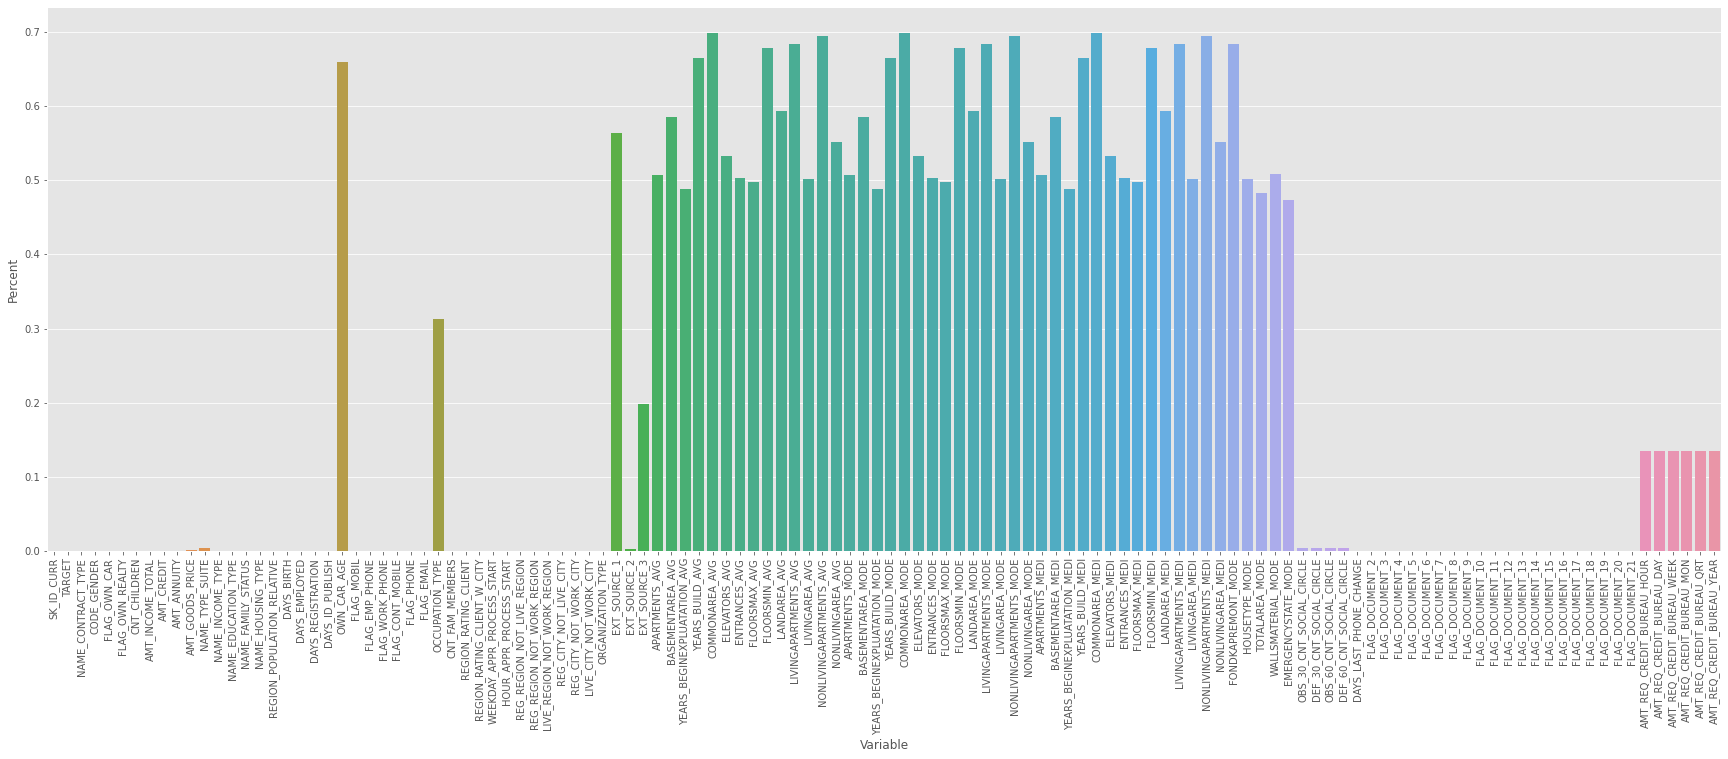

In [5]:
# Missing values
missing_vals = pd.DataFrame(app_train.isnull().sum())
missing_vals.reset_index(inplace=True)
missing_vals = missing_vals.rename(columns = {0:"Counts", "index":"Variable"})
missing_vals["Percent"] = missing_vals.Counts / len(app_train)
plt.figure(figsize = (30, 10))
sns.barplot(missing_vals.Variable, missing_vals.Percent)
plt.xticks(rotation = 90)
plt.show()

In [6]:
missing_vals[missing_vals.Percent >= 0.4]

,Variable,Counts,Percent
21,OWN_CAR_AGE,202929,0.659908
41,EXT_SOURCE_1,173378,0.563811
44,APARTMENTS_AVG,156061,0.507497
45,BASEMENTAREA_AVG,179943,0.585160
46,YEARS_BEGINEXPLUATATION_AVG,150007,0.487810
47,YEARS_BUILD_AVG,204488,0.664978
48,COMMONAREA_AVG,214865,0.698723
49,ELEVATORS_AVG,163891,0.532960
50,ENTRANCES_AVG,154828,0.503488
51,FLOORSMAX_AVG,153020,0.497608


In [7]:
print(len(app_train[app_train.FLAG_OWN_CAR == "N"]) ==  missing_vals[missing_vals.Variable == "OWN_CAR_AGE"].Counts[21], "\n",
    len(app_train[app_train.FLAG_OWN_CAR == "N"]),  missing_vals[missing_vals.Variable == "OWN_CAR_AGE"].Counts[21])

app_train[ (app_train["FLAG_OWN_CAR"] == "Y") & (app_train['OWN_CAR_AGE'].isnull()) ]

False 
 202924 202929


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
30897,135867,0,Cash loans,M,Y,N,1,495000.0,1006920.0,45630.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
181231,310040,0,Cash loans,F,Y,N,0,112500.0,301464.0,22068.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
217549,352070,0,Cash loans,M,Y,N,0,225000.0,900000.0,26446.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
229867,366246,0,Cash loans,F,Y,Y,1,225000.0,518562.0,25078.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
236868,374361,0,Cash loans,F,Y,Y,0,225000.0,233833.5,26577.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0


The majority of variables with high rates of missing data include information relating to details of the the borrowers living quarters, such as the year the building was built, number of elevators, number of entrances, etc. All of these variables dont include vital information to determine whether a client may experience difficulties paying back their loans. What kind of reasonable person know these kinds of things anyways!? 

For simplicity of the model, all of these variable will be dropped. Now to explore the other variables with missing data. 

In [8]:
missing_vals[(missing_vals.Percent < 0.4) & (missing_vals.Percent > 0)]

,Variable,Counts,Percent
9,AMT_ANNUITY,12,0.000039
10,AMT_GOODS_PRICE,278,0.000904
11,NAME_TYPE_SUITE,1292,0.004201
28,OCCUPATION_TYPE,96391,0.313455
29,CNT_FAM_MEMBERS,2,0.000007
42,EXT_SOURCE_2,660,0.002146
43,EXT_SOURCE_3,60965,0.198253
91,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.003320
92,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.003320
93,OBS_60_CNT_SOCIAL_CIRCLE,1021,0.003320


In [9]:
print(missing_vals[(missing_vals.Percent < 0.4) & (missing_vals.Percent > 0)])

                       Variable  Counts   Percent
9                   AMT_ANNUITY      12  0.000039
10              AMT_GOODS_PRICE     278  0.000904
11              NAME_TYPE_SUITE    1292  0.004201
28              OCCUPATION_TYPE   96391  0.313455
29              CNT_FAM_MEMBERS       2  0.000007
42                 EXT_SOURCE_2     660  0.002146
43                 EXT_SOURCE_3   60965  0.198253
91     OBS_30_CNT_SOCIAL_CIRCLE    1021  0.003320
92     DEF_30_CNT_SOCIAL_CIRCLE    1021  0.003320
93     OBS_60_CNT_SOCIAL_CIRCLE    1021  0.003320
94     DEF_60_CNT_SOCIAL_CIRCLE    1021  0.003320
95       DAYS_LAST_PHONE_CHANGE       1  0.000003
116  AMT_REQ_CREDIT_BUREAU_HOUR   41519  0.135016
117   AMT_REQ_CREDIT_BUREAU_DAY   41519  0.135016
118  AMT_REQ_CREDIT_BUREAU_WEEK   41519  0.135016
119   AMT_REQ_CREDIT_BUREAU_MON   41519  0.135016
120   AMT_REQ_CREDIT_BUREAU_QRT   41519  0.135016
121  AMT_REQ_CREDIT_BUREAU_YEAR   41519  0.135016


In [10]:
cols_2_drop = [x for x in missing_vals[missing_vals.Percent >= 0.4].Variable][2:]
cols_2_drop = cols_2_drop + app_train.filter(like = "AMT_REQ").columns.tolist()
app_train_red = app_train.drop(cols_2_drop, axis = 1)
app_test_red = app_test.drop(cols_2_drop, axis = 1)

In [11]:
err = 

SyntaxError: invalid syntax (<ipython-input-11-a5e84bef5d9a>, line 1)

### Other questoins

In [ ]:
# Do the rows in the datasets correspond to unique borrowers?
print("Is the training set composed of unique individuals only?", len(app_train.SK_ID_CURR.unique()) == len(app_train), "\n",
"Is the test set composed of unique individuals only?", len(app_test.SK_ID_CURR.unique()) == len(app_test) )

Is the training set composed of unique individuals only? True 
 Is the test set composed of unique individuals only? True


In [ ]:
# Checking if there are new burrowers with no previous loan from Home Credit
print("Are there any borrowers who are new applicants to Home Credit?" ,
    prev_app.SK_ID_CURR.unique().shape[0] <= app_train.SK_ID_CURR.unique().shape[0] + app_test.SK_ID_CURR.unique().shape[0] )

current_customers = pd.concat([app_train.SK_ID_CURR, app_test.SK_ID_CURR])
print("There are currently %d new customers in the database" %current_customers.isin(prev_app.SK_ID_CURR).value_counts()[0])

# Note, everyone in the previous application dataset has an application in the training or testing set.
prev_app.SK_ID_CURR.isin(pd.concat([app_train.SK_ID_CURR, app_test.SK_ID_CURR])).value_counts()

Are there any borrowers who are new applicants to Home Credit? True
There are currently 17398 new customers in the database


True    1670214
Name: SK_ID_CURR, dtype: int64

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


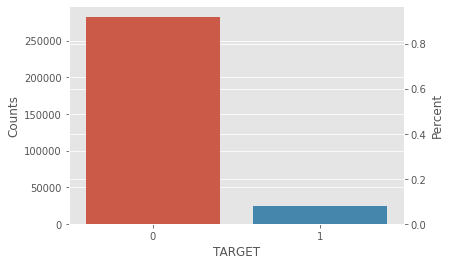

In [ ]:

target_counts = app_train.value_counts('TARGET')
target_counts = target_counts.reset_index()
target_counts = target_counts.rename(columns = {0:"Counts"})
target_counts["Percent"] = target_counts.Counts / len(app_train)

sns.barplot(target_counts.TARGET, target_counts.Counts)
ax2 = plt.twinx()
sns.barplot(target_counts.TARGET, target_counts.Percent)
plt.show()

## Explore Data

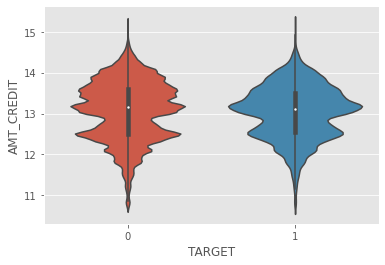

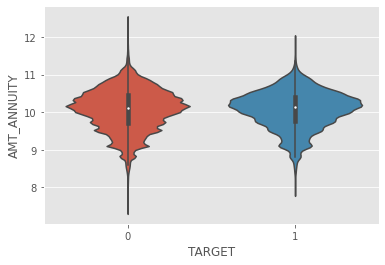

In [ ]:
sns.violinplot(x = app_train.TARGET, y = np.log(app_train.AMT_CREDIT))
plt.show()
sns.violinplot(x = app_train.TARGET, y = np.log(app_train.AMT_ANNUITY))
plt.show()
sns.violinplot(x = app_train.TARGET, y = np.log(app_train.AMT_INCOME_TOTAL))
plt.show()

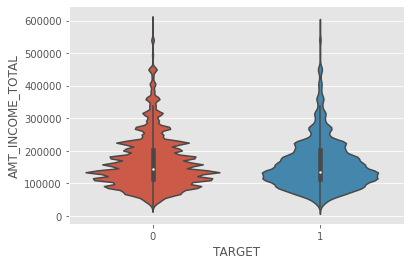

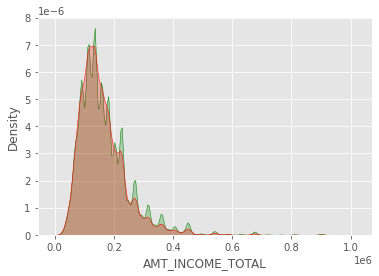

In [ ]:
sns.violinplot(x = app_train.TARGET, y = app_train.AMT_INCOME_TOTAL[app_train['AMT_INCOME_TOTAL'] < 600000])
plt.show()
# sns.kdeplot(app_train.AMT_INCOME_TOTAL[app_train['AMT_INCOME_TOTAL'] < 600000], shade=True)
sns.kdeplot(app_train.loc[(app_train["TARGET"] == 0)  &  (app_train["AMT_INCOME_TOTAL"] < 1000000)].AMT_INCOME_TOTAL, shade = True, color = "g")
sns.kdeplot(app_train.loc[(app_train["TARGET"] == 1)  &  (app_train["AMT_INCOME_TOTAL"] < 1000000)].AMT_INCOME_TOTAL, shade = True, color = "r")
plt.show()

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

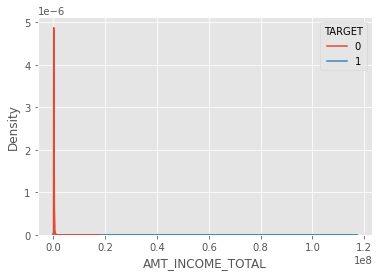

In [ ]:
sns.kdeplot(x = app_train.AMT_INCOME_TOTAL, hue = app_train.TARGET)

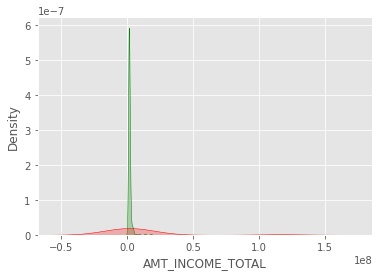

In [ ]:
sns.kdeplot(app_train.loc[(app_train["TARGET"] == 0)  &  (app_train["AMT_INCOME_TOTAL"] >= 1000000)].AMT_INCOME_TOTAL, shade = True, color = "g")
sns.kdeplot(app_train.loc[(app_train["TARGET"] == 1)  &  (app_train["AMT_INCOME_TOTAL"] >= 1000000)].AMT_INCOME_TOTAL, shade = True, color = "r")
plt.show()

There doesnt seem to be a discernible difference between the people who had difficulty paying their loans and those who paid on time based on their income for those with an income below 1,000,000. A better indicator would perhaps be the amount of credit they received.

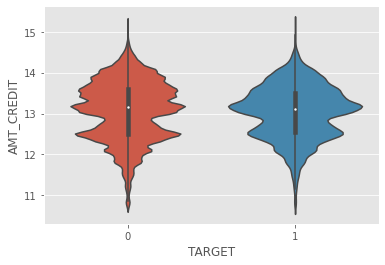

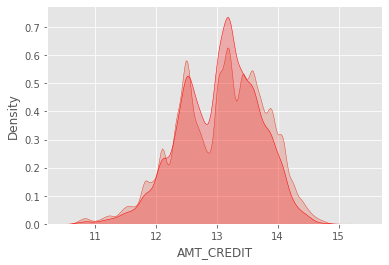

In [ ]:
sns.violinplot(x = app_train.TARGET, y = np.log(app_train.AMT_CREDIT))
plt.show()
sns.kdeplot(np.log(app_train.AMT_CREDIT[app_train["TARGET"] == 0]), shade = True)
sns.kdeplot(np.log(app_train.AMT_CREDIT[app_train["TARGET"] == 1]), shade = True, color = "r")
plt.show()

In [ ]:
print(app_train.groupby("TARGET").agg({"AMT_CREDIT" : "mean", "AMT_INCOME_TOTAL" : "mean"}))
print(app_train.groupby("TARGET").agg({"AMT_CREDIT" : "median", "AMT_INCOME_TOTAL" : "median"}))

           AMT_CREDIT  AMT_INCOME_TOTAL
TARGET                                 
0       602648.282002     169077.722266
1       557778.527674     165611.760906
        AMT_CREDIT  AMT_INCOME_TOTAL
TARGET                              
0         517788.0          148500.0
1         497520.0          135000.0


In [ ]:
# print(stats.ttest_ind(np.log(app_train.AMT_CREDIT[app_train['TARGET'] == 0]), np.log(app_train.AMT_CREDIT[app_train['TARGET'] == 1], equal_var = False))
mean_test = sm.stats.CompareMeans(  sm.stats.DescrStatsW(np.log(app_train.AMT_CREDIT[app_train['TARGET'] == 0])),
                                    sm.stats.DescrStatsW(np.log(app_train.AMT_CREDIT[app_train['TARGET'] == 1])) )
mean_test.summary(use_t = False, usevar = "unequal")

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,0.0320,0.004,7.462,0.000,0.024,0.040


In [ ]:
effect_size = sm.stats.TTestIndPower()
effect_size.solve_power(power = 0.8, effect_size = None, alpha = 0.05, nobs1 = len(app_train))

0.007145704676096104

In [ ]:
def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    mux = np.mean(x)
    muy = np.mean(y)
    sdx = np.std(x, ddof = 1)
    sdy = np.std(y, ddof = 1)
    sd_pooled = np.sqrt( ((nx - 1)*sdx**2 + (ny - 1)*sdy**2) / (nx + ny - 2) )
    return (mux - muy) / sd_pooled


d = cohens_d(np.log(app_train.AMT_CREDIT[app_train['TARGET'] == 0]), np.log(app_train.AMT_CREDIT[app_train['TARGET'] == 1]))
print("log cohens score", d, "\n", "cohens d", np.exp(d))

log cohens score 0.044717992823558324 
 cohens d 1.0457329141358318


In [ ]:
ols_model = sm.formula.ols("TARGET ~ AMT_CREDIT", data = app_train).fit()
sm.stats.anova_lm(ols_model)

,df,sum_sq,mean_sq,F,PR(>F)
AMT_CREDIT,1.0,21.047576,21.047576,283.875387,1.147460e-63
Residual,307509.0,22799.859481,0.074144,NaN,NaN


perhaps try a non parametric test since the distribution is clearly not close to normal, even in log-scale

### Income vs Credit Approved for

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

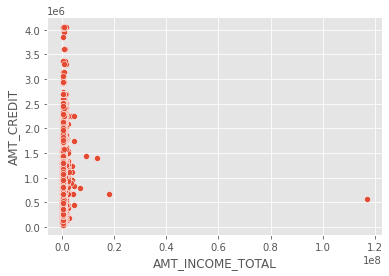

In [ ]:
# Look like we have an outlier skewing the data
sns.scatterplot(data = app_train_red, x = "AMT_INCOME_TOTAL", y = "AMT_CREDIT")

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

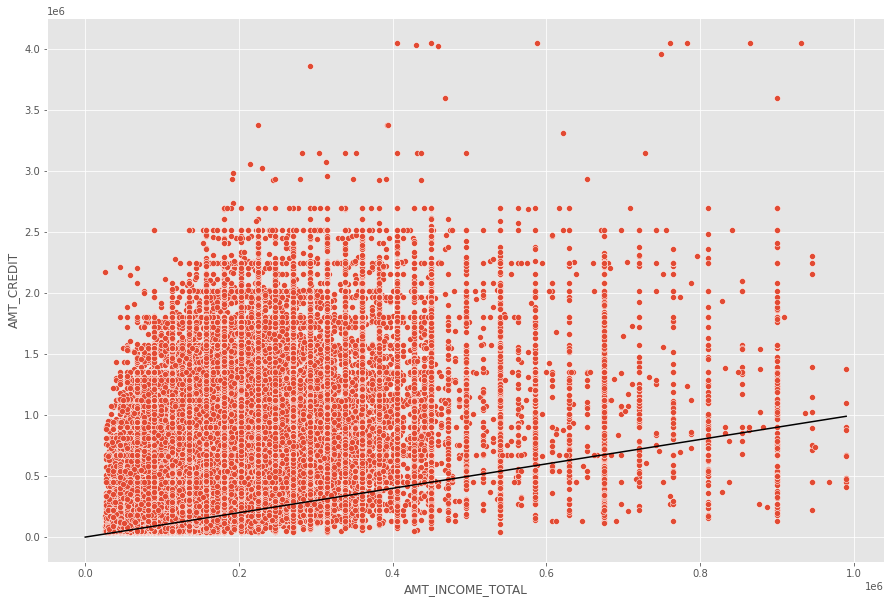

In [ ]:
condition = app_train_red.AMT_INCOME_TOTAL <=1000000
plt.figure(figsize = (15, 10))
sns.scatterplot(x = app_train_red.AMT_INCOME_TOTAL[condition], y = app_train_red.AMT_CREDIT[condition])
sns.lineplot(x = [0, max(app_train_red.AMT_INCOME_TOTAL[condition])], y = [0, max(app_train_red.AMT_INCOME_TOTAL[condition])], color = "black")


As expected, there is a positive correlation between income and the amount of credit they received, albeit loosely. 
Oddly enough, the vast majority of people receive loans greater than their income, though the documentation never specified the frequency of the income variable, ie whether it is weekly, monthly, yearly, etc.


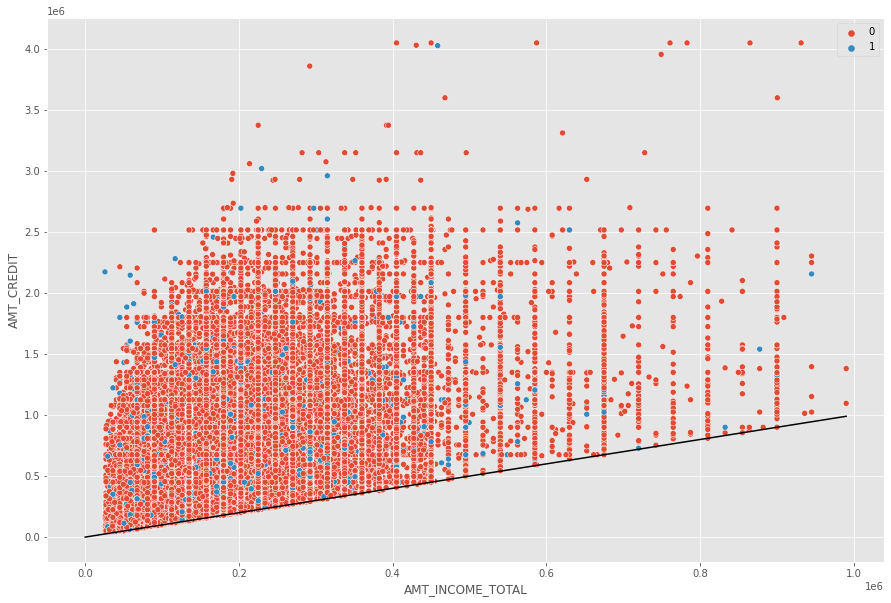

In [ ]:
condition = (app_train_red.AMT_INCOME_TOTAL <=1000000) & (app_train_red.AMT_INCOME_TOTAL <= app_train_red.AMT_CREDIT)
plt.figure(figsize = (15, 10))
sns.scatterplot(x = app_train_red.AMT_INCOME_TOTAL[condition], y = app_train_red.AMT_CREDIT[condition], hue = app_train_red.TARGET[condition])
sns.lineplot(x = [0, max(app_train_red.AMT_INCOME_TOTAL[condition])], y = [0, max(app_train_red.AMT_INCOME_TOTAL[condition])], color = "black")
plt.show()

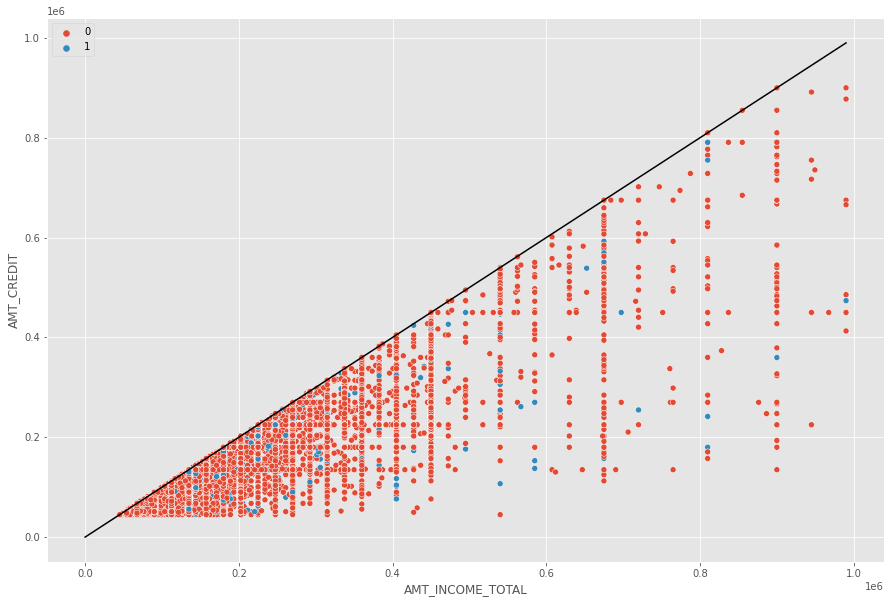

In [ ]:
condition = (app_train_red.AMT_INCOME_TOTAL <=1000000) & (app_train_red.AMT_INCOME_TOTAL >= app_train_red.AMT_CREDIT)
plt.figure(figsize = (15, 10))
sns.scatterplot(x = app_train_red.AMT_INCOME_TOTAL[condition], y = app_train_red.AMT_CREDIT[condition], hue = app_train_red.TARGET[condition])
sns.lineplot(x = [0, max(app_train_red.AMT_INCOME_TOTAL[condition])], y = [0, max(app_train_red.AMT_INCOME_TOTAL[condition])], color = "black")
plt.show()

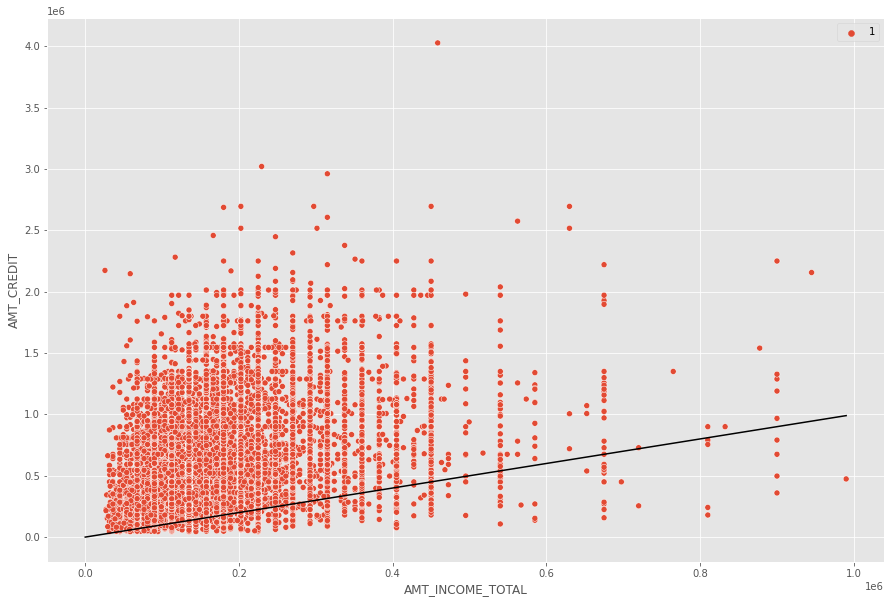

In [ ]:
condition = (app_train_red.AMT_INCOME_TOTAL <=1000000) & (app_train_red.TARGET == 1)
plt.figure(figsize = (15, 10))
sns.scatterplot(x = app_train_red.AMT_INCOME_TOTAL[condition], y = app_train_red.AMT_CREDIT[condition], hue = app_train_red.TARGET[condition])
sns.lineplot(x = [0, max(app_train_red.AMT_INCOME_TOTAL[condition])], y = [0, max(app_train_red.AMT_INCOME_TOTAL[condition])], color = "black")
plt.show()

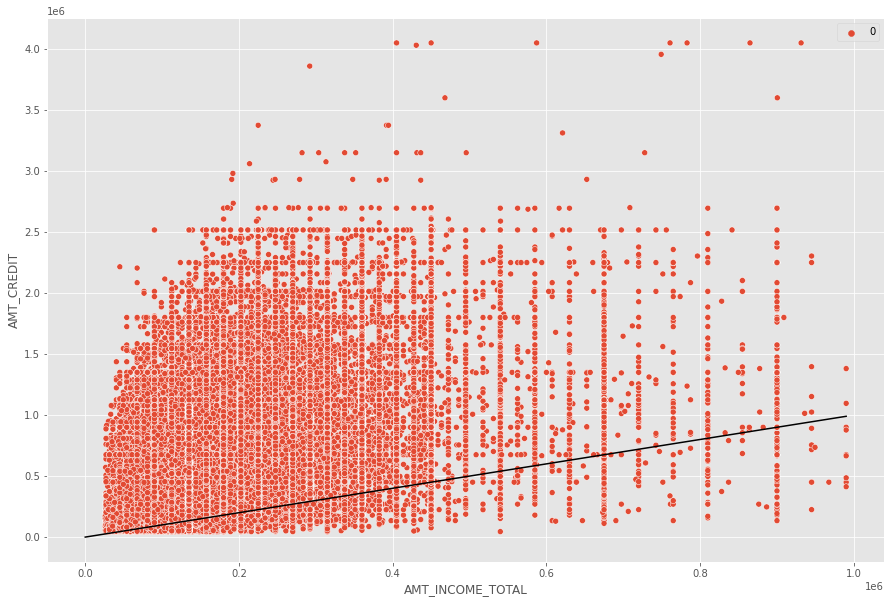

In [ ]:
condition = (app_train_red.AMT_INCOME_TOTAL <=1000000) & (app_train_red.TARGET == 0)
plt.figure(figsize = (15, 10))
sns.scatterplot(x = app_train_red.AMT_INCOME_TOTAL[condition], y = app_train_red.AMT_CREDIT[condition], hue = app_train_red.TARGET[condition])
sns.lineplot(x = [0, max(app_train_red.AMT_INCOME_TOTAL[condition])], y = [0, max(app_train_red.AMT_INCOME_TOTAL[condition])], color = "black")
plt.show()

## Prev Application

In [ ]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


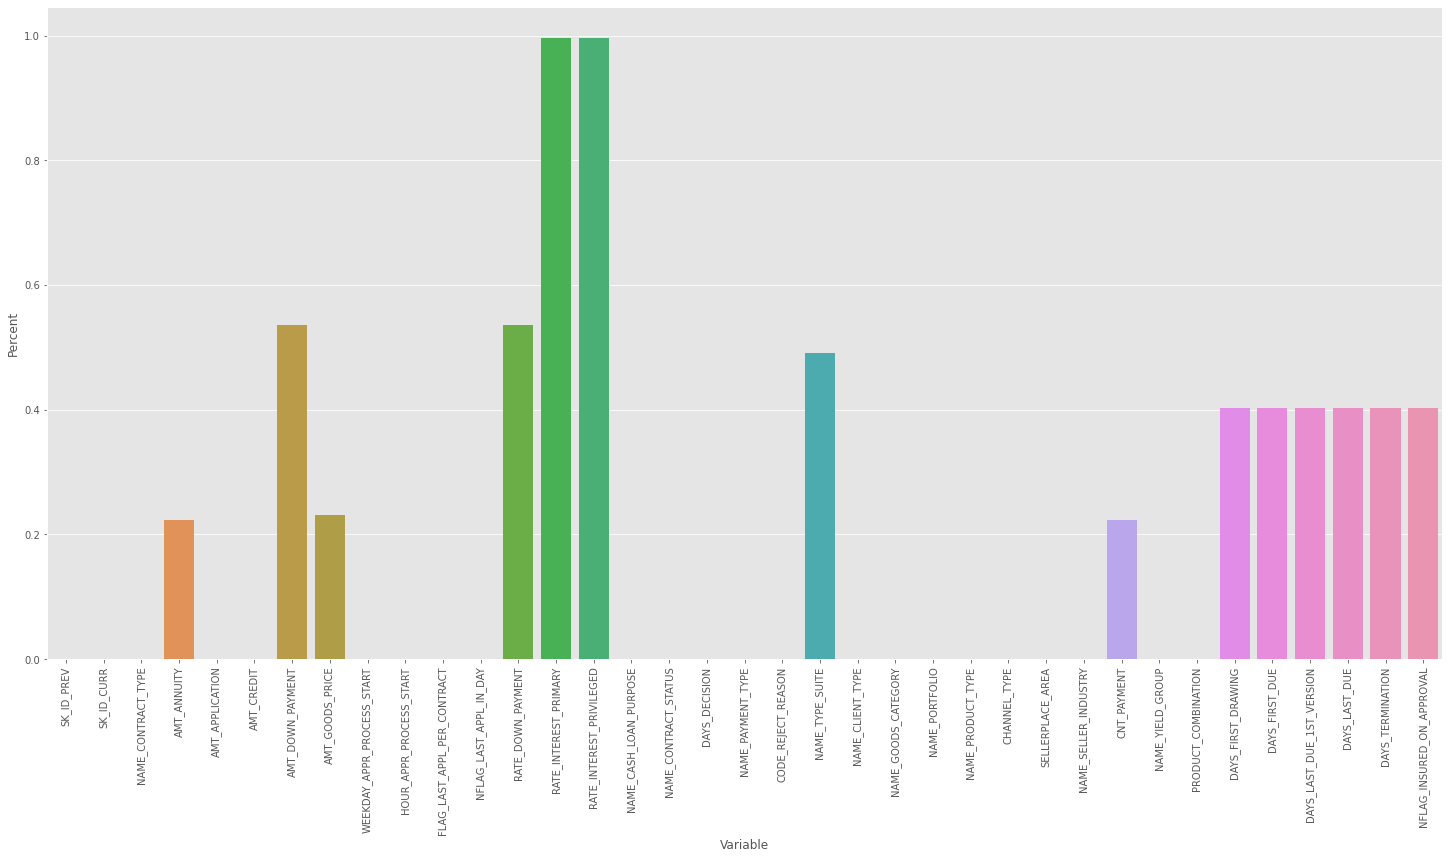

,Variable,Counts,Percent
14,RATE_INTEREST_PRIVILEGED,1664263,9.964370e-01
13,RATE_INTEREST_PRIMARY,1664263,9.964370e-01
6,AMT_DOWN_PAYMENT,895844,5.363648e-01
12,RATE_DOWN_PAYMENT,895844,5.363648e-01
20,NAME_TYPE_SUITE,820405,4.911975e-01
36,NFLAG_INSURED_ON_APPROVAL,673065,4.029813e-01
35,DAYS_TERMINATION,673065,4.029813e-01
34,DAYS_LAST_DUE,673065,4.029813e-01
33,DAYS_LAST_DUE_1ST_VERSION,673065,4.029813e-01
32,DAYS_FIRST_DUE,673065,4.029813e-01


In [ ]:
prev_app_missing = pd.DataFrame(prev_app.isnull().sum())
prev_app_missing = prev_app_missing.reset_index()
prev_app_missing = prev_app_missing.rename(columns = {'index':"Variable", 0:"Counts"})
prev_app_missing["Percent"] = prev_app_missing.Counts / len(prev_app)

plt.figure(figsize = (25, 12))
sns.barplot(prev_app_missing.Variable, prev_app_missing.Percent)
plt.xticks(rotation = 90)
plt.show()

prev_app_missing.sort_values(by = "Percent", ascending = False)

### Previous Application EDA

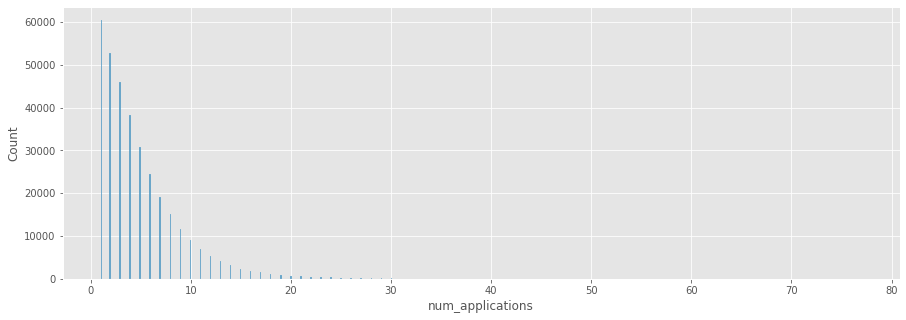

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


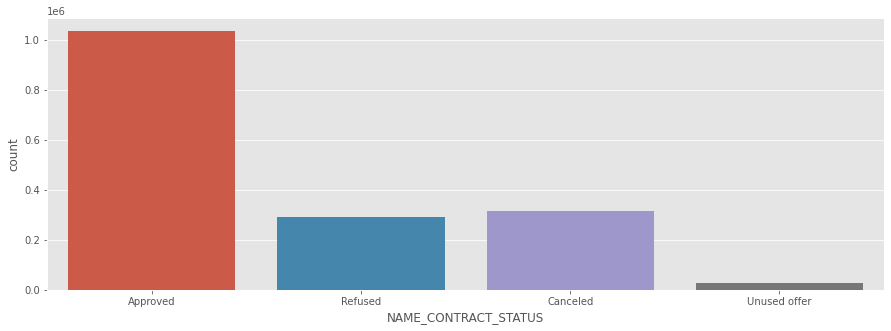

In [ ]:
# People with more than 1 previous loan through Home Credit
num_prev_apps = pd.DataFrame(prev_app['SK_ID_CURR'].value_counts()).reset_index().rename(columns = {'index':'SK_ID_CURR', 'SK_ID_CURR':'num_applications'})
plt.figure(figsize = (15, 5))
sns.histplot(num_prev_apps.num_applications)
plt.show()

# The majority of applications have applied 10 times to Home Credit for a loan. But what was the status of their applications?
plt.figure(figsize = (15, 5))
sns.countplot(prev_app.NAME_CONTRACT_STATUS)
plt.show()

In [ ]:
# There are people that applied multiple times but were rejected of refused a loan for some reason. Could definitely be beneficial to model
prev_app[prev_app.SK_ID_CURR == 187868].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
37305,1703693,187868,Cash loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,2,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
56117,1677569,187868,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,9,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
67781,1651393,187868,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
92787,1173037,187868,Cash loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,9,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
170959,2636986,187868,Cash loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,8,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(prev_app.SK_ID_CURR.unique())

338857

In [ ]:
# Previous Application Statuses
approval_rates = pd.pivot_table(prev_app, index = ["SK_ID_CURR"], columns = ["NAME_CONTRACT_STATUS"], values = "AMT_ANNUITY", aggfunc = len, fill_value=0)
approval_rates.head()

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
SK_ID_CURR,,,,
100001,1,0,0,0
100002,1,0,0,0
100003,3,0,0,0
100004,1,0,0,0
100005,1,1,0,0


In [ ]:
rates = approval_rates.apply(lambda x: x/sum(x), axis = 1)
rates.columns = approval_rates.columns + "_rate"
rates.head()

NAME_CONTRACT_STATUS,Approved_rate,Canceled_rate,Refused_rate,Unused offer_rate
SK_ID_CURR,,,,
100001,1.0,0.0,0.0,0.0
100002,1.0,0.0,0.0,0.0
100003,1.0,0.0,0.0,0.0
100004,1.0,0.0,0.0,0.0
100005,0.5,0.5,0.0,0.0


In [ ]:
approval_rates["approval_rate"] = rates["Approved_rate"]
approval_rates.reset_index(inplace=True)
approval_rates = approval_rates.merge(num_prev_apps, on = "SK_ID_CURR")

KeyboardInterrupt: 

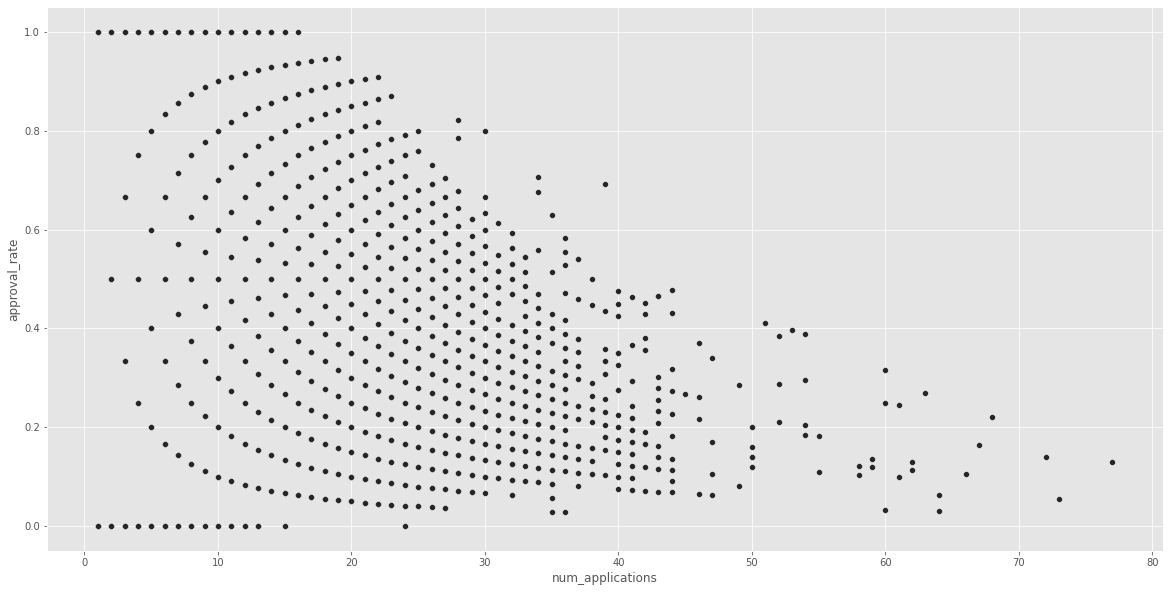

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x = approval_rates.num_applications, y = approval_rates.approval_rate, color = "0.15")
sns.histplot(x = approval_rates.num_applications, y = approval_rates.approval_rate, pthresh = 1, cmap = "mako")
sns.kdeplot(x = approval_rates.num_applications, y = approval_rates.approval_rate)
plt.xticks(np.arange(0, 85, 5))
plt.show()

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='counts'>

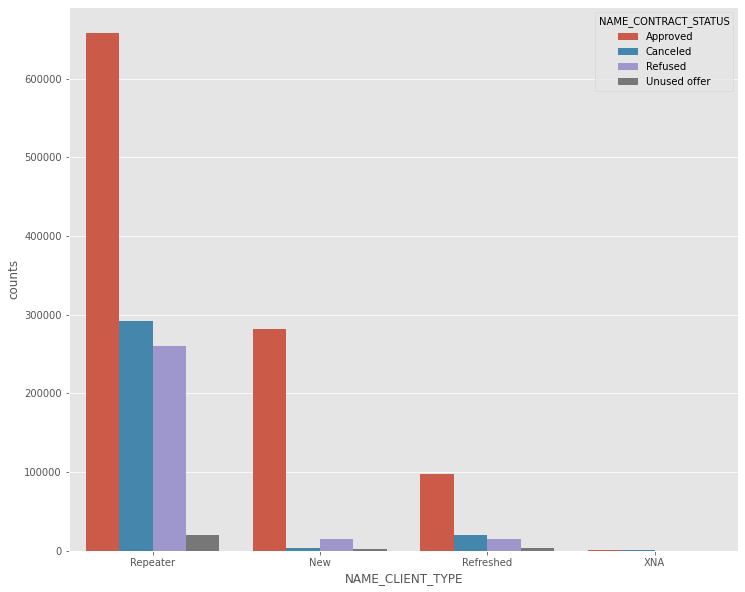

In [ ]:

table = pd.DataFrame(prev_app.value_counts(["NAME_CLIENT_TYPE", "NAME_CONTRACT_STATUS"])).reset_index()
table = table.rename(columns = {0:"counts"})
plt.figure(figsize = (12, 10))
sns.barplot(x = "NAME_CLIENT_TYPE", y = "counts", hue = "NAME_CONTRACT_STATUS", data = table)

In [ ]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


The vast majority of the borrowers in the dataset containing previous applications contained repeat borrowers, nowhere near as many new customers as i initially believed might be the case. Moreover, most new prospective burrowers had their loans approved by the lender.

In [ ]:
prev_app.value_counts(["NAME_CONTRACT_STATUS","CODE_REJECT_REASON"])

NAME_CONTRACT_STATUS  CODE_REJECT_REASON
Approved              XAP                   1036773
Canceled              XAP                    316319
Refused               HC                     175231
                      LIMIT                   55680
                      SCO                     37467
Unused offer          CLIENT                  26436
Refused               SCOFR                   12811
                      XNA                      5236
                      VERIF                    3535
                      SYSTEM                    717
Approved              XNA                         8
Refused               XAP                         1
dtype: int64

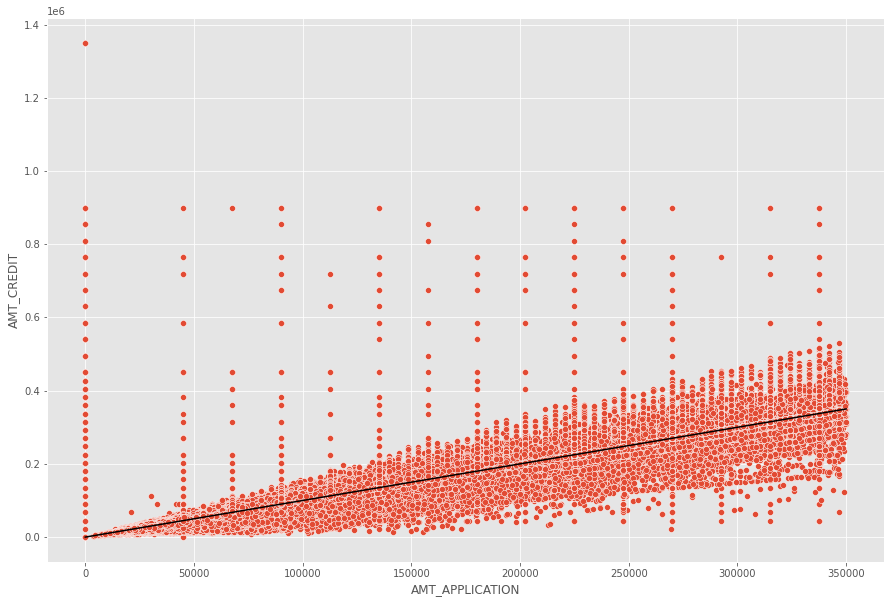

In [ ]:
condition = prev_app.AMT_APPLICATION <= 350000
plt.figure(figsize = (15, 10))
sns.scatterplot(x = prev_app.AMT_APPLICATION[condition], y = prev_app.AMT_CREDIT[condition])
sns.lineplot(x = [0, max(prev_app.AMT_APPLICATION[condition])], y = [0, max(prev_app.AMT_APPLICATION[condition])], color = "black")
plt.show()

In [ ]:
print("The mean for the amount of credits applicants applied for is :", round(np.mean(prev_app.AMT_APPLICATION), 2), "\n", 
    "The mean credit the borrower received from the lender is:", round(np.mean(prev_app.AMT_CREDIT), 2))


# Oddly enough, the borrowers on average could have received more than they initially applied for. 
# Perhaps borrowers with higher approval rates or those whose application was accepted received more credit than they initially applied for. 

The mean for the amount of credits applicants applied for is : 175233.86 
 The mean credit the borrower received from the lender is: 196114.02


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x720 with 0 Axes>

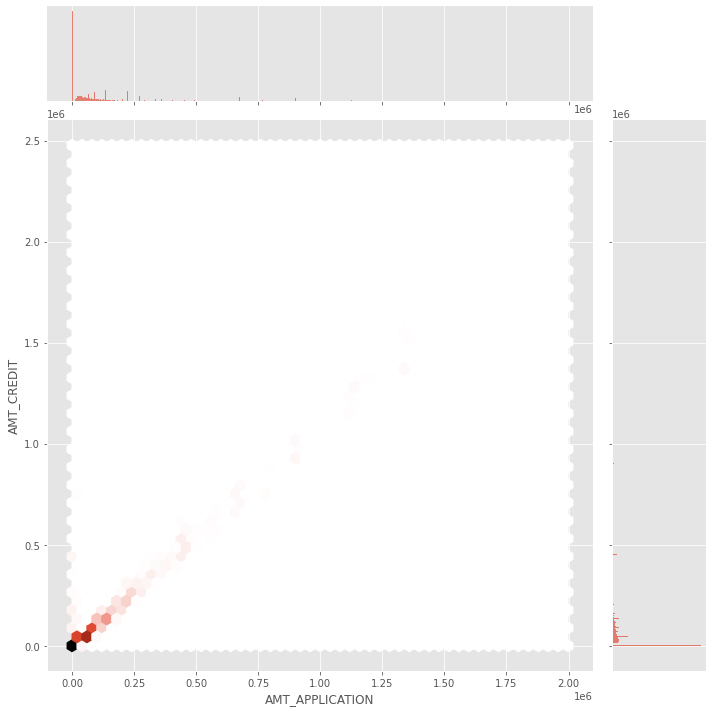

In [ ]:
condition = prev_app.AMT_APPLICATION <= 2000000
plt.figure(figsize = (20, 10))
sns.jointplot(x = prev_app.AMT_APPLICATION[condition], y = prev_app.AMT_CREDIT[condition], kind = "hex", size = 10)
plt.show()

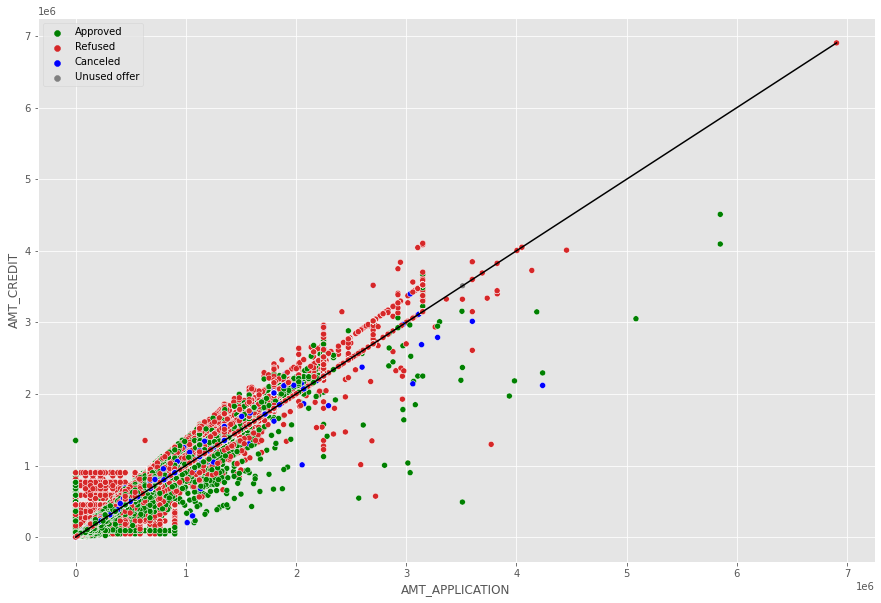

                      AMT_APPLICATION     AMT_CREDIT
NAME_CONTRACT_STATUS                                
Approved                180567.000949  202564.182131
Canceled                 22730.011481   24187.057127
Refused                 331760.510938  371689.841222
Unused offer             69760.732970   69783.990800


In [ ]:
plt.figure(figsize = (15, 10))
palette = {"Approved":"green", "Refused":"tab:red", "Canceled":"blue", "Unused offer":"gray"}
sns.scatterplot(x = prev_app.AMT_APPLICATION, y = prev_app.AMT_CREDIT, hue = prev_app.NAME_CONTRACT_STATUS, palette = palette)
sns.lineplot(x = [0, max(prev_app.AMT_APPLICATION)], y = [0, max(prev_app.AMT_APPLICATION)], color = "black")
plt.show()
print(prev_app.groupby("NAME_CONTRACT_STATUS").agg({'AMT_APPLICATION':"mean", 'AMT_CREDIT':"mean"}))

In [ ]:
condition = (prev_app.AMT_APPLICATION <= 3500000) & (prev_app.AMT_APPLICATION > prev_app.AMT_CREDIT)
plt.figure(figsize = (15, 10))
sns.scatterplot(x = prev_app.AMT_APPLICATION[condition], y = prev_app.AMT_CREDIT[condition], hue = prev_app.NAME_CONTRACT_STATUS[condition], palette = palette)
sns.lineplot(x = [0, max(prev_app.AMT_APPLICATION[condition])], y = [0, max(prev_app.AMT_APPLICATION[condition])], color = "black")
plt.show()
print(prev_app[condition].groupby("NAME_CONTRACT_STATUS").agg({'AMT_APPLICATION':"mean", 'AMT_CREDIT':"mean"}))

NameError: name 'palette' is not defined

<Figure size 1080x720 with 0 Axes>

KernelInterrupted: Execution interrupted by the Jupyter kernel.

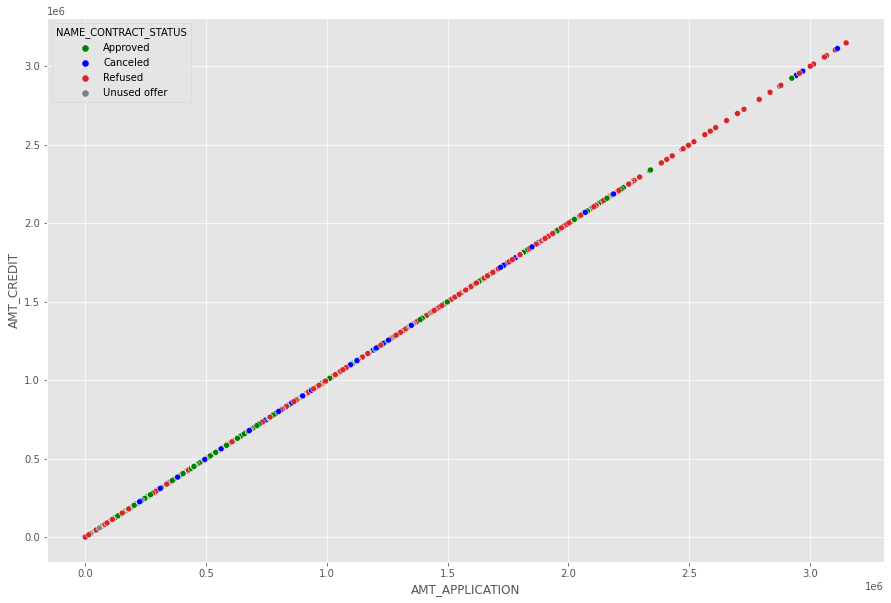

In [ ]:
condition = (prev_app.AMT_APPLICATION <= 3500000) & (prev_app.AMT_APPLICATION == prev_app.AMT_CREDIT)
plt.figure(figsize = (15, 10))
sns.scatterplot(x = prev_app.AMT_APPLICATION[condition], y = prev_app.AMT_CREDIT[condition], hue = prev_app.NAME_CONTRACT_STATUS[condition], palette = palette)
plt.show()
print(prev_app[condition].groupby("NAME_CONTRACT_STATUS").agg({'AMT_APPLICATION':"mean", 'AMT_CREDIT':"mean"}))

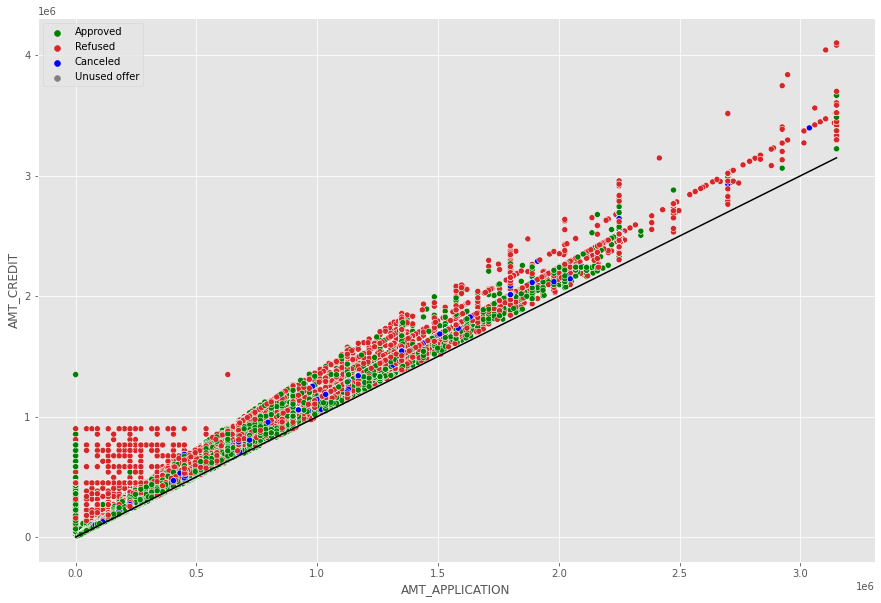

In [ ]:
condition = (prev_app.AMT_APPLICATION <= 3500000) & (prev_app.AMT_APPLICATION < prev_app.AMT_CREDIT)
plt.figure(figsize = (15, 10))
sns.scatterplot(x = prev_app.AMT_APPLICATION[condition], y = prev_app.AMT_CREDIT[condition], hue = prev_app.NAME_CONTRACT_STATUS[condition], palette = palette)
sns.lineplot(x = [0, max(prev_app.AMT_APPLICATION[condition])], y = [0, max(prev_app.AMT_APPLICATION[condition])], color = "black")
plt.show()
print(prev_app[condition].groupby("NAME_CONTRACT_STATUS").agg({'AMT_APPLICATION':"mean", 'AMT_CREDIT':"mean"}))

In [ ]:
prev_app[condition].groupby("NAME_CONTRACT_STATUS").agg({'AMT_APPLICATION':"mean", 'AMT_CREDIT':"mean"})

,AMT_APPLICATION,AMT_CREDIT
NAME_CONTRACT_STATUS,,
Approved,224966.273760,275803.313883
Canceled,633246.106011,721032.559890
Refused,451034.192102,541662.239556
Unused offer,77747.727273,133907.318182


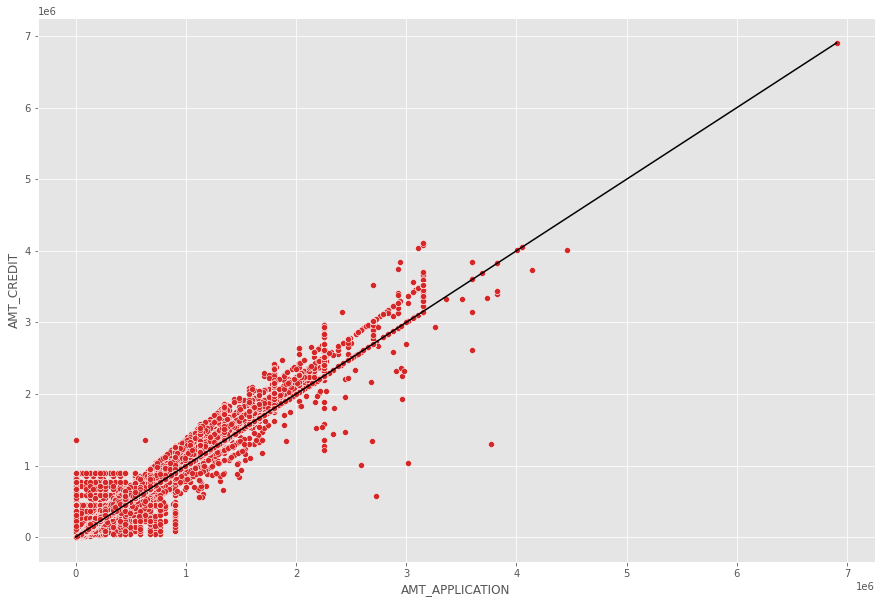

In [ ]:
condition = prev_app.NAME_CONTRACT_STATUS == "Refused"
plt.figure(figsize = (15, 10))
sns.scatterplot(x = prev_app.AMT_APPLICATION[condition], y = prev_app.AMT_CREDIT[condition], color = "tab:red")
sns.lineplot(x = [0, max(prev_app.AMT_APPLICATION[condition])], y = [0, max(prev_app.AMT_APPLICATION[condition])], color = "black")
plt.show()
print(prev_app[condition].groupby("NAME_CONTRACT_STATUS").agg({'AMT_APPLICATION':"mean", 'AMT_CREDIT':"mean"}))

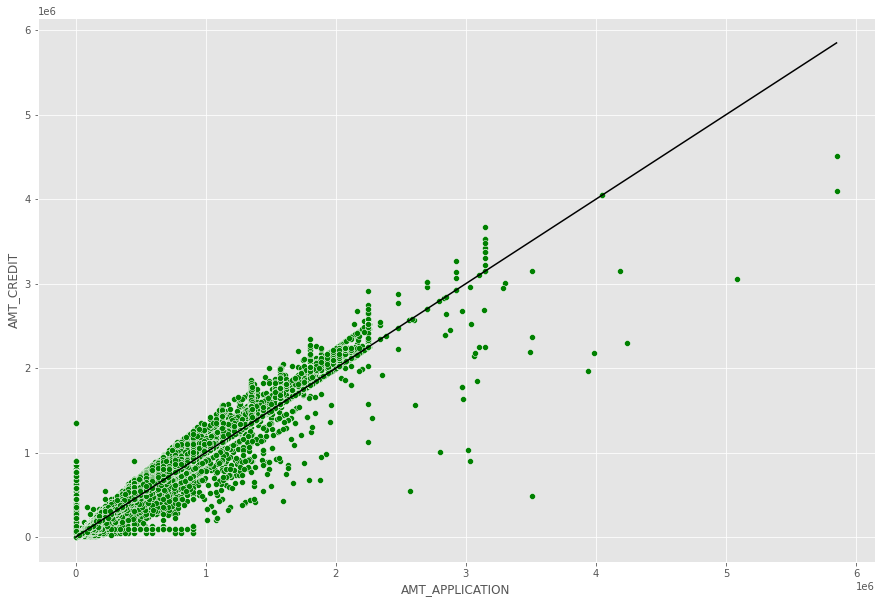

In [ ]:
condition = prev_app.NAME_CONTRACT_STATUS == "Approved"
plt.figure(figsize = (15, 10))
sns.scatterplot(x = prev_app.AMT_APPLICATION[condition], y = prev_app.AMT_CREDIT[condition], color = "green")
sns.lineplot(x = [0, max(prev_app.AMT_APPLICATION[condition])], y = [0, max(prev_app.AMT_APPLICATION[condition])], color = "black")
plt.show()
print(prev_app[condition].groupby("NAME_CONTRACT_STATUS").agg({'AMT_APPLICATION':"mean", 'AMT_CREDIT':"mean"}))

### Current Applications EDA

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9263f292-ea73-48e7-8892-f3d3ed1db03c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>